In [1]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data  = pd.read_csv('Train_data.csv')
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [3]:
data.shape

(2351, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [5]:
data.isnull().sum().sort_values()

Glucose                                      0
Troponin                                     0
Creatinine                                   0
Heart Rate                                   0
AST                                          0
ALT                                          0
HDL Cholesterol                              0
LDL Cholesterol                              0
HbA1c                                        0
Triglycerides                                0
Diastolic Blood Pressure                     0
C-reactive Protein                           0
Systolic Blood Pressure                      0
Insulin                                      0
Mean Corpuscular Hemoglobin Concentration    0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Volume                      0
Hematocrit                                   0
Red Blood Cells                              0
White Blood Cells                            0
Platelets                                    0
Hemoglobin   

In [6]:
data.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Glucose,2351.000000,0.362828,0.251889,0.010994,0.129198,0.351722,0.582278,0.968460
Cholesterol,2351.000000,0.393648,0.239449,0.012139,0.195818,0.397083,0.582178,0.905026
Hemoglobin,2351.000000,0.586190,0.271498,0.003021,0.346092,0.609836,0.791215,0.983306
Platelets,2351.000000,0.504027,0.303347,0.012594,0.200865,0.533962,0.754841,0.999393
White Blood Cells,2351.000000,0.511086,0.277270,0.010139,0.259467,0.527381,0.743164,0.990786
Red Blood Cells,2351.000000,0.506590,0.266565,0.044565,0.263589,0.467431,0.743670,1.000000
Hematocrit,2351.000000,0.507152,0.285537,0.011772,0.288132,0.493428,0.753657,0.977520
Mean Corpuscular Volume,2351.000000,0.492200,0.275735,0.046942,0.287532,0.453052,0.722293,0.995263
Mean Corpuscular Hemoglobin,2351.000000,0.484459,0.315618,0.000554,0.207938,0.420723,0.778160,0.963235
Mean Corpuscular Hemoglobin Concentration,2351.000000,0.562273,0.273281,0.006947,0.355774,0.603635,0.741381,0.975586


In [7]:
Numerical=data.select_dtypes(exclude='object').columns.tolist()
Numerical

['Glucose',
 'Cholesterol',
 'Hemoglobin',
 'Platelets',
 'White Blood Cells',
 'Red Blood Cells',
 'Hematocrit',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Insulin',
 'BMI',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Triglycerides',
 'HbA1c',
 'LDL Cholesterol',
 'HDL Cholesterol',
 'ALT',
 'AST',
 'Heart Rate',
 'Creatinine',
 'Troponin',
 'C-reactive Protein']

In [8]:
unique_values=[None]*len(Numerical)
for i, p in enumerate(Numerical):
    unique_values[i]= len(data[p].unique())
    print('unique_values',p," =", unique_values[i])

unique_values Glucose  = 65
unique_values Cholesterol  = 65
unique_values Hemoglobin  = 65
unique_values Platelets  = 65
unique_values White Blood Cells  = 65
unique_values Red Blood Cells  = 65
unique_values Hematocrit  = 65
unique_values Mean Corpuscular Volume  = 65
unique_values Mean Corpuscular Hemoglobin  = 65
unique_values Mean Corpuscular Hemoglobin Concentration  = 65
unique_values Insulin  = 65
unique_values BMI  = 65
unique_values Systolic Blood Pressure  = 65
unique_values Diastolic Blood Pressure  = 65
unique_values Triglycerides  = 65
unique_values HbA1c  = 65
unique_values LDL Cholesterol  = 65
unique_values HDL Cholesterol  = 65
unique_values ALT  = 65
unique_values AST  = 65
unique_values Heart Rate  = 65
unique_values Creatinine  = 65
unique_values Troponin  = 65
unique_values C-reactive Protein  = 65


In [9]:
number_of_outliers=[None]*len(Numerical)
q75=[None]*len(Numerical)
q25=[None]*len(Numerical)
IQR=[None]*len(Numerical)
unique_values=[None]*len(Numerical)
ratio=[None]*len(Numerical)

for i, p in enumerate(Numerical):
    q75[i], q25[i]= np.percentile(data[p],[95,5])
    IQR[i]= q75[i]- q25[i]
    #number_of_outliers[i]=df[~((df[p] < (q75[i] + 1.5 * IQR[i])) & (df[p] > (q25[i]-1.5*IQR[i])))].shape[0]
    number_of_outliers[i]=len((np.where((data[p] > (q75[i] + 1.5 * IQR[i])) | (data[p]< (q25[i] - 1.5 * IQR[i])))[0]))
    unique_values[i]= len(data[p].unique())
    ratio[i]= number_of_outliers[i]/unique_values[i]
    print('outliers of',p," =", number_of_outliers[i])
    print('unique_values',p," =", unique_values[i])
    print('ratio',p," =", ratio[i])
    print("*"*40)

outliers of Glucose  = 0
unique_values Glucose  = 65
ratio Glucose  = 0.0
****************************************
outliers of Cholesterol  = 0
unique_values Cholesterol  = 65
ratio Cholesterol  = 0.0
****************************************
outliers of Hemoglobin  = 0
unique_values Hemoglobin  = 65
ratio Hemoglobin  = 0.0
****************************************
outliers of Platelets  = 0
unique_values Platelets  = 65
ratio Platelets  = 0.0
****************************************
outliers of White Blood Cells  = 0
unique_values White Blood Cells  = 65
ratio White Blood Cells  = 0.0
****************************************
outliers of Red Blood Cells  = 0
unique_values Red Blood Cells  = 65
ratio Red Blood Cells  = 0.0
****************************************
outliers of Hematocrit  = 0
unique_values Hematocrit  = 65
ratio Hematocrit  = 0.0
****************************************
outliers of Mean Corpuscular Volume  = 0
unique_values Mean Corpuscular Volume  = 65
ratio Mean Corpuscul

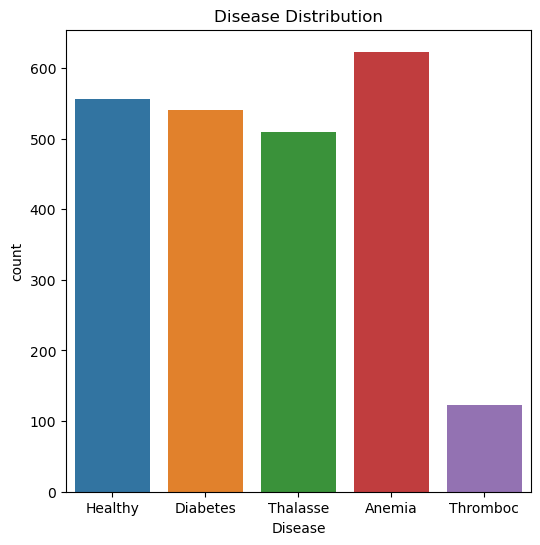

In [10]:
# Plot feature (sex)
plt.figure(figsize=(6,6))
sns.countplot(x='Disease', data=data)
plt.title('Disease Distribution')
plt.show() 
# we show that male more than female

In [11]:
data_test  = pd.read_csv('test_data.csv')
data_test.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [12]:
data_test.shape

(486, 25)

In [13]:
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [14]:
data_test.isnull().sum().sort_values()

Glucose                                      0
Troponin                                     0
Creatinine                                   0
Heart Rate                                   0
AST                                          0
ALT                                          0
HDL Cholesterol                              0
LDL Cholesterol                              0
HbA1c                                        0
Triglycerides                                0
Diastolic Blood Pressure                     0
C-reactive Protein                           0
Systolic Blood Pressure                      0
Insulin                                      0
Mean Corpuscular Hemoglobin Concentration    0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Volume                      0
Hematocrit                                   0
Red Blood Cells                              0
White Blood Cells                            0
Platelets                                    0
Hemoglobin   

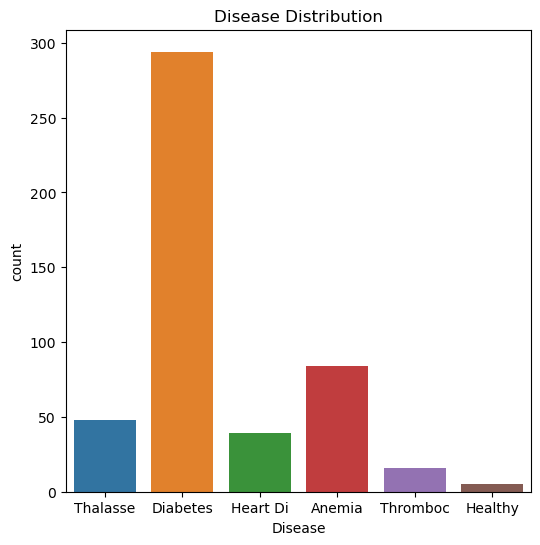

In [15]:
# Plot feature (sex)
plt.figure(figsize=(6,6))
sns.countplot(x='Disease', data=data_test)
plt.title('Disease Distribution')
plt.show() 

In [16]:
values_to_extract = ['Heart Di']
extracted_rows = data_test[data_test['Disease'].isin(values_to_extract)]

In [17]:
extracted_rows.shape

(39, 25)

In [18]:
extracted_rows.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di
5,0.321872,0.554649,0.195652,0.427216,0.807751,0.376964,0.519526,0.028090,0.382538,0.568205,...,0.711377,0.887863,0.370344,0.607066,0.936445,0.160355,0.108994,0.599071,0.560535,Heart Di
8,0.186686,0.210425,0.165662,0.207388,0.918350,0.746808,0.230674,0.616086,0.533183,0.400058,...,0.600902,0.812273,0.332766,0.797290,0.190961,0.298596,0.877684,0.966106,0.306355,Heart Di
20,0.312681,0.536807,0.372231,0.421224,0.848956,0.484288,0.433265,0.621170,0.248446,0.776860,...,0.824140,0.970789,0.553343,0.472022,0.786526,0.237201,0.300540,0.354148,0.595731,Heart Di


In [19]:
print(data_test['Disease'].value_counts())
print(data_test['Disease'].unique().tolist())

Disease
Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: count, dtype: int64
['Thalasse', 'Diabetes', 'Heart Di', 'Anemia', 'Thromboc', 'Healthy']


In [20]:
# Concatenate the two datasets
all_data = pd.concat([data, data_test], ignore_index=True)

# Display the first few rows of the combined dataset
print("\nCombined Dataset Preview:")
all_data.head()


Combined Dataset Preview:


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

In [22]:
print(all_data['Disease'].value_counts())
print(all_data['Disease'].unique().tolist())

Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64
['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc', 'Heart Di']


In [23]:
all_data['Disease'] = all_data['Disease'].replace(['Anemia', 'Healthy', 'Diabetes', 'Thalasse', 'Thromboc','Heart Di'],[1,2,3,4,5,6])

In [24]:
print(all_data['Disease'].value_counts())
print(all_data['Disease'].unique().tolist())

Disease
3    834
1    707
2    561
4    557
5    139
6     39
Name: count, dtype: int64
[2, 3, 4, 1, 5, 6]


C:\Users\iT\AppData\Local\Temp\ipykernel_13128\3631530056.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(range(len(indices)), importances[indices], color='r', align='center')


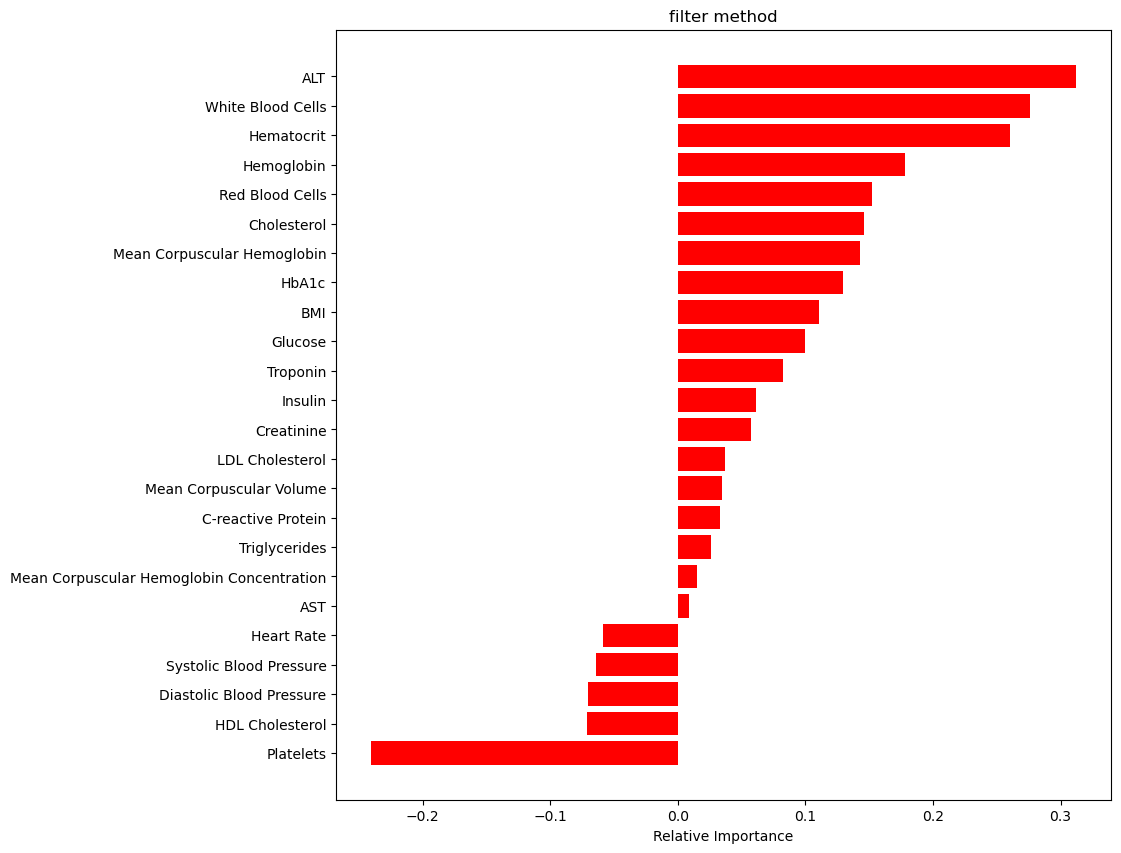

In [25]:
# correlation between each feature and the target column (Status)
importances = all_data.drop('Disease', axis=1).apply(lambda x: x.corr(all_data.Disease))
indices = np.argsort(importances)
names=list(all_data.drop('Disease', axis=1).columns)
plt.figure(figsize=(10,10))
plt.title('filter method')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [26]:
X = all_data.drop('Disease', axis=1)
y = all_data['Disease']

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_smote, y_smote = smote.fit_resample(X, y)

In [28]:
test_size = 486/2837
print(test_size) 

0.17130771942192458


In [29]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your full dataset and labels
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=123)


In [30]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
# use random forest with 1000 tree
classifier_RF = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train) # fit the model in train data 

# Predicting the Test set results
y_pred_RF = classifier_RF.predict(X_test)

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import f1_score


# Calculate the Accuracy, Precision, and Recall
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_RF))

# For multiclass classification, use 'macro', 'micro', or 'weighted' average
print("Precision (micro):", metrics.precision_score(y_test, y_pred_RF, average='micro'))
print("Recall (micro):", metrics.recall_score(y_test, y_pred_RF, average='micro'))

print("Precision (macro):", metrics.precision_score(y_test, y_pred_RF, average='macro'))
print("Recall (macro):", metrics.recall_score(y_test, y_pred_RF, average='macro'))

print("Precision (weighted):", metrics.precision_score(y_test, y_pred_RF, average='weighted'))
print("Recall (weighted):", metrics.recall_score(y_test, y_pred_RF, average='weighted'))

# Calculate the F1 score
f1 = f1_score(y_test, y_pred_RF, average='weighted')
print("F1 Score:", f1)



Accuracy: 0.9760239760239761
Precision (micro): 0.9760239760239761
Recall (micro): 0.9760239760239761
Precision (macro): 0.9756612969908205
Recall (macro): 0.9756586138260506
Precision (weighted): 0.9783065419401098
Recall (weighted): 0.9760239760239761
F1 Score: 0.9762629377532742
